🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

### Comenzamos importando y creando todo lo que necesitaremos en el código
🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

In [2]:
import pandas as pd

# Leer el fichero csv desde GitHub
url = "https://raw.githubusercontent.com/Violainedlst/proyecto-da-promo-H-modulo-3-team-2-People-pulse/main/CSVs/HR_RAW_DATA.csv"
data_bruto = pd.read_csv(url)

# Para ver el fichero entero
pd.set_option('display.max_columns', None)

# Variables a utilizar posteriormente
columns_to_drop = ["id", "same_as_monthly_income", "employee_count", "salary", "standard_hours", "over_18", 
                   "performance_rating", "number_children", "years_in_current_role"]
columns_with_commas = ['daily_rate', 'monthly_income', 'employee_number', 'total_working_years', 
                       'work_life_balance']
replacements = {'forty-seven': '47', 'fifty-eight': '58', 'thirty-six': '36', 'fifty-five': '55', 'fifty-two': '52', 
                'thirty-one': '31', 'thirty': '30',
                    'twenty-six': '26', 'thirty-seven': '37', 'thirty-two': '32', 'twenty-four': '24'}
columns_to_int = [
        'age', 'year_birth', 'employee_number', 'distance_from_home', 'stock_option_level', 'education',
        'monthly_rate', 'hourly_rate', 'percent_salary_hike', 'environment_satisfaction', 'job_involvement',
        'job_satisfaction', 'relationship_satisfaction', 'work_life_balance', 'num_companies_worked',
        'training_times_last_year', 'total_working_years', 'years_at_company', 'years_since_last_promotion',
        'years_with_curr_manager', 'daily_rate', 'monthly_income'
    ]

# Crea una copia del DataFrame para no actuar directamente sobre el original
data = data_bruto.copy()

data.head(10)

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0
5,5,48,No,NaN,"117,0$",Research & Development,22,3,Medical,1,"1900,0",4,1,58,3,4,MANAger,4,NaN,"17174,0",2437,3,NaN,No,11,"3,0",2,NaN,1,NaN,3,"3,0",22,NaN,4,7,"17174,0",1975,1000000000$,MANAger - Research & Development,NaN,Yes
6,6,59,No,NaN,"1435,0$",NaN,25,3,Life Sciences,1,"81,0",1,1,99,3,3,Sales ExeCutIVe,1,NaN,NaN,2354,7,Y,NaN,11,"3,0",4,NaN,0,"28,0",3,"2,0",21,NaN,7,9,NaN,1964,1000000000$,NaN,NaN,True
7,7,42,No,travel_rarely,"635,0$",NaN,1,1,NaN,1,"387,0",2,0,99,3,2,Sales eXEcUTiVe,3,Married,NaN,24532,1,NaN,No,25,"4,0",3,NaN,0,"20,0",3,"3,0",20,NaN,11,6,NaN,1981,1000000000$,NaN,NaN,0
8,8,41,No,NaN,"1276,0$",NaN,2,5,NaN,1,NaN,2,1,91,3,4,mANAGEr,1,Married,"16595,0",5626,7,NaN,No,16,"3,0",2,NaN,1,"22,0",2,"3,0",18,NaN,11,8,"16595,0",1982,1000000000$,NaN,NaN,True
9,9,41,No,travel_frequently,"840,0$",NaN,9,3,NaN,1,"999,0",1,0,64,3,5,reSEaRCH DIrectoR,3,NaN,NaN,3735,2,NaN,No,17,"3,0",2,NaN,1,"21,0",2,"4,0",18,NaN,0,11,NaN,1982,1000000000$,NaN,NaN,0


_ _ _

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

### Comienzan las funciones 💥

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

- Columnas a Minúsculas

In [3]:
def lowercase_columns(df):
    # Convertir los nombres de las columnas a minúsculas

    df.columns = [column.lower().strip() for column in df.columns]
    return df

- Cambiar Nombres

In [4]:
def rename_columns(df):
    # Renombrar columnas para mayor claridad
    data.rename(columns={
        'unnamed: 0': 'id',
        'businesstravel': 'business_travel',
        'dailyrate': 'daily_rate',
        'distancefromhome': 'distance_from_home',
        'educationfield': 'education_field',
        'employeecount': 'employee_count',
        'employeenumber': 'employee_number',
        'environmentsatisfaction': 'environment_satisfaction',
        'hourlyrate': 'hourly_rate',
        'jobinvolvement': 'job_involvement',
        'joblevel': 'job_level',
        'jobrole': 'job_role',
        'jobsatisfaction': 'job_satisfaction',
        'maritalstatus': 'marital_status',
        'monthlyincome': 'monthly_income',
        'monthlyrate': 'monthly_rate',
        'numcompaniesworked': 'num_companies_worked',
        'over18': 'over_18',
        'overtime': 'overtime',
        'percentsalaryhike': 'percent_salary_hike',
        'performancerating': 'performance_rating',
        'relationshipsatisfaction': 'relationship_satisfaction',
        'standardhours': 'standard_hours',
        'stockoptionlevel': 'stock_option_level',
        'totalworkingyears': 'total_working_years',
        'trainingtimeslastyear': 'training_times_last_year',
        'worklifebalance': 'work_life_balance',
        'yearsatcompany': 'years_at_company',
        'yearsincurrentrole': 'years_in_current_role',
        'yearssincelastpromotion': 'years_since_last_promotion',
        'yearswithcurrmanager': 'years_with_curr_manager',
        'sameasmonthlyincome': 'same_as_monthly_income',
        'datebirth': 'year_birth',
        'roledepartament': 'role_department',
        'numberchildren': 'number_children',
        'remotework': 'remote_work'
    }, inplace=True)
    return df

- Eliminar Columnas

In [5]:
def drop_unnecessary_columns(df):
    # Definir columnas a eliminar    
    existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    # Eliminar las columnas especificadas
    df = df.drop(columns=existing_columns_to_drop)
    return df

- Rellenar 'Employee_number' de forma consecutiva

In [6]:
def update_employee_numbers(df, column_name):
    # Convertir la columna 'employee_number' a numérico, forzando errores a NaN, y luego a entero
    df['employee_number'] = pd.to_numeric(df['employee_number'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)
    
    # Identificar duplicados en la columna
    duplicados = df.duplicated(subset=column_name, keep=False)
    
    # Obtener los valores únicos actuales
    valores_unicos = set(df[column_name])
    
    # Inicializar un nuevo número que no esté en valores_unicos
    max_valor_actual = max(valores_unicos)
    nuevos_numeros = iter(range(max_valor_actual + 1, max_valor_actual + 1 + duplicados.sum()))
    
    # Asignar nuevos números a las filas duplicadas
    df.loc[duplicados, column_name] = [next(nuevos_numeros) for _ in range(duplicados.sum())]
    
    return df

- Eliminar Espacios en Blanco

In [7]:
def strip_whitespace(df):
    # Eliminar espacios en blanco en todo el DataFrame
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    return df

- Cambiar Cadenas a Minúsculas

In [8]:
def lowercase_all_strings(df):
    # Convertir todas las cadenas a minúsculas
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower()
    return df

- Convertir DataFrame a Tipo 'Str'

In [9]:
def convert_to_string(df):
    # Convertir todo el DataFrame a tipo string
    df = df.astype(str)
    return df

- Limpiar Valores Específicos

In [10]:
def clean_column_values(df):
    # Limpiar y reemplazar valores específicos en varias columnas
    df['daily_rate'] = df['daily_rate'].str.replace('$', '', regex=False)
    df['business_travel'] = df['business_travel'].str.replace('-', '_', regex=False)
    df['distance_from_home'] = df['distance_from_home'].str.replace('-', '', regex=False)
    df['hourly_rate'] = df['hourly_rate'].str.replace('not available', '0', regex=False)
    df['remote_work'] = df['remote_work'].apply(lambda x: 'yes' if x in ['1', 'true', 'yes'] else 'no')
    df["gender"] = df["gender"].replace({'0': 'male', '1': 'female'})
    data["marital_status"] = data["marital_status"].str.replace('marreid', 'married', regex=False)
    return df

- Reemplazar Comas por Puntos 

In [11]:
def replace_commas(df):
    # Reemplazar comas por puntos en ciertas columnas  
    for col in columns_with_commas:
        df[col] = df[col].str.replace(',', '.', regex=False)
    return df

- Rellenar Valores Nulos y Reemplazar 'NaN'

In [12]:
def fill_na_values(df):
    # Rellenar valores nulos y reemplazar 'nan'
    df = data.fillna('n/a')
    df = data.replace('nan', 'n/a')
    return df

- Arreglar Columna 'age'

In [13]:
def replace_age_values(df):
    # Reemplazar ciertos valores de texto en la columna 'age'    
    df['age'] = df['age'].replace(replacements)
    return df

- Imprimir Valores Únicos

In [14]:
def print_unique_values(df):
    # Imprimir valores únicos de cada columna
    for column in data.columns:
        print(f"Columna: {column}")
        print(df[column].unique())
        print("\n--------------------\n")

- Convertir Columnas Específicas a 'int'

In [15]:
def convert_columns_to_int(df):
    # Convertir cada columna a int, manejando valores 'n/a'
    for column in columns_to_int:
        df[column] = pd.to_numeric(df[column], errors='coerce')
        mean_value = df[column].mean()
        df[column] = df[column].fillna(mean_value)
        df[column] = df[column].apply(int)
    return df

_ _ _ 

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

## Llegó la hora de ejecutar funciones 🧨 "¿Explotará todo?"

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

_ _ _

### Pasamos todos los nombres de columnas a minúsculas ⬇

🟣                      🟣                      🟣                      🟣                      🟣

In [16]:
# Ejecutar funciones en orden
data = lowercase_columns(data)

In [17]:
data_bruto.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [18]:
data.columns

Index(['unnamed: 0', 'age', 'attrition', 'businesstravel', 'dailyrate',
       'department', 'distancefromhome', 'education', 'educationfield',
       'employeecount', 'employeenumber', 'environmentsatisfaction', 'gender',
       'hourlyrate', 'jobinvolvement', 'joblevel', 'jobrole',
       'jobsatisfaction', 'maritalstatus', 'monthlyincome', 'monthlyrate',
       'numcompaniesworked', 'over18', 'overtime', 'percentsalaryhike',
       'performancerating', 'relationshipsatisfaction', 'standardhours',
       'stockoptionlevel', 'totalworkingyears', 'trainingtimeslastyear',
       'worklifebalance', 'yearsatcompany', 'yearsincurrentrole',
       'yearssincelastpromotion', 'yearswithcurrmanager',
       'sameasmonthlyincome', 'datebirth', 'salary', 'roledepartament',
       'numberchildren', 'remotework'],
      dtype='object')

### Las diferencias son evidentes ¡ha funcionado! 👌

_ _ _ 

### Renombramos las columnas para facilitar la lectura y el uso 🤓

🟣                      🟣                      🟣                      🟣                      🟣

In [19]:
data = rename_columns(data)

In [20]:
data.columns

Index(['id', 'age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_18', 'overtime', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager',
       'same_as_monthly_income', 'year_birth', 'salary', 'role_department',
       'number_children', 'remote_work'],
      dtype='object')

Las diferencias son evidentes ¡ha funcionado! 👏

_ _ _ 

### Quitamos las columnas que no necesitamos 💢

🟣                      🟣                      🟣                      🟣                      🟣

In [21]:
data.shape

(1614, 42)

In [22]:
data = drop_unnecessary_columns(data)

In [23]:
data.shape

(1614, 33)

### Se han restado las columnas ¡ha funcionado!💪

_ _ _ 

### Rellenamos los 'Employee_number' de forma consecutiva ➕

🟣                      🟣                      🟣                      🟣                      🟣

In [24]:
# Comprobamos duplicados en columna 'employee_number'
data.duplicated('employee_number').sum()

534

In [25]:
# Aplicar la función
data = update_employee_numbers(data, 'employee_number')

In [26]:
# Comprobamos ausencia de duplicados en columna 'employee_number'
data.duplicated('employee_number').sum()

0

### Suma y sigue. Seguimos bien 😁

_ _ _ 

### Quitamos todos los espacios en blanco 🕳

🟣                      🟣                      🟣                      🟣                      🟣

In [27]:
# Identificar columnas con espacios en blanco
columns_with_whitespace = [col for col in data.columns if data[col].astype(str).str.contains(' ').any()]
columns_with_whitespace

['department', 'education_field', 'hourly_rate', 'job_role', 'role_department']

In [28]:
data = strip_whitespace(data)

/tmp/ipykernel_17871/981170955.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [29]:
# Comprobamos que ya no haya columnas que contengan espacios
for column in data.columns:
    if ' ' in column:
        print(column)

### ¡No imprime nada! Eso significa que ha funcionado 😊

_ _ _

### Pasamos todos los datos de tipo 'str' a minúscula 🔠➡🔡

🟣                      🟣                      🟣                      🟣                      🟣

In [30]:
print_unique_values(data)

Columna: age
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']

--------------------

Columna: attrition
['No' 'Yes']

--------------------

Columna: business_travel
[nan 'travel_rarely' 'travel_frequently' 'non-travel']

--------------------

Columna: daily_rate
['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1321

In [31]:
# Convertimos todos los tipos de datos a 'str'
data = lowercase_all_strings(data)

In [32]:
print_unique_values(data)

Columna: age
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']

--------------------

Columna: attrition
['no' 'yes']

--------------------

Columna: business_travel
[nan 'travel_rarely' 'travel_frequently' 'non-travel']

--------------------

Columna: daily_rate
['684,0$' '699,0$' '532,0$' '359,0$' '1319,0$' '117,0$' '1435,0$' '635,0$'
 '1276,0$' '840,0$' '247,0$' '1369,0$' '201,0$' '1360,0$' '692,0$'
 '1398,0$' '286,0$' '1402,0$' '819,0$' '884,0$' '1238,0$' '515,0$'
 '1223,0$' '202,0$' '928,0$' '607,0$' '266,0$' '429,0$' '589,0$' 'nan$'
 '1180,0$' '1282,0$' '776,0$' '665,0$' '526,0$' '1034,0$' '1403,0$'
 '1499,0$' '580,0$' '859,0$' '263,0$' '1376,0$' '885,0$' '1003,0$'
 '1321

### ¡Seguimos consiguiéndolo! 😎

_ _ _

### Convertimos todos los tipos de datos a 'str' 🅰

🟣                      🟣                      🟣                      🟣                      🟣

In [33]:
data.dtypes

age                           object
attrition                     object
business_travel               object
daily_rate                    object
department                    object
distance_from_home             int64
education                      int64
education_field               object
employee_number                int64
environment_satisfaction       int64
gender                         int64
hourly_rate                   object
job_involvement                int64
job_level                      int64
job_role                      object
job_satisfaction               int64
marital_status                object
monthly_income                object
monthly_rate                   int64
num_companies_worked           int64
overtime                      object
percent_salary_hike            int64
relationship_satisfaction      int64
stock_option_level             int64
total_working_years           object
training_times_last_year       int64
work_life_balance             object
y

In [34]:
data = convert_to_string(data)

In [35]:
data.dtypes

age                           object
attrition                     object
business_travel               object
daily_rate                    object
department                    object
distance_from_home            object
education                     object
education_field               object
employee_number               object
environment_satisfaction      object
gender                        object
hourly_rate                   object
job_involvement               object
job_level                     object
job_role                      object
job_satisfaction              object
marital_status                object
monthly_income                object
monthly_rate                  object
num_companies_worked          object
overtime                      object
percent_salary_hike           object
relationship_satisfaction     object
stock_option_level            object
total_working_years           object
training_times_last_year      object
work_life_balance             object
y

### Todas son 'str' 🎉

_ _ _

### Limpiamos los símbolos raros y el ruido innecesario 💲

🟣                      🟣                      🟣                      🟣                      🟣

In [36]:
data.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
0,51,no,nan,"684,0$",nan,6,3,nan,1620,1,0,51,3,5,research director,3,nan,"19537,0",6462,7,no,13,3,0,nan,5,"3,0",20,15,15,1972,nan,yes
1,52,no,nan,"699,0$",nan,1,4,life sciences,2590,3,0,65,2,5,manager,3,nan,"19999,0",5678,0,nan,14,1,1,"34,0",5,"3,0",33,11,9,1971,nan,1
2,42,no,travel_rarely,"532,0$",research & development,4,2,technical degree,3190,3,0,58,3,5,manager,4,married,"19232,0",4933,1,no,11,4,0,"22,0",3,nan,22,11,15,1981,manager - research & development,1


In [37]:
data = clean_column_values(data)

In [38]:
data.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
0,51,no,nan,"684,0",nan,6,3,nan,1620,1,male,51,3,5,research director,3,nan,"19537,0",6462,7,no,13,3,0,nan,5,"3,0",20,15,15,1972,nan,yes
1,52,no,nan,"699,0",nan,1,4,life sciences,2590,3,male,65,2,5,manager,3,nan,"19999,0",5678,0,nan,14,1,1,"34,0",5,"3,0",33,11,9,1971,nan,yes
2,42,no,travel_rarely,"532,0",research & development,4,2,technical degree,3190,3,male,58,3,5,manager,4,married,"19232,0",4933,1,no,11,4,0,"22,0",3,nan,22,11,15,1981,manager - research & development,yes


### ¡Reluciente! ✨

_ _ _

### Cambiamos las ',' por '.' 💫 ¿Será simplemente una buena racha? 🤔

🟣                      🟣                      🟣                      🟣                      🟣

In [39]:
data = replace_commas(data)

In [40]:
data.head(3)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
0,51,no,nan,684.0,nan,6,3,nan,1620,1,male,51,3,5,research director,3,nan,19537.0,6462,7,no,13,3,0,nan,5,3.0,20,15,15,1972,nan,yes
1,52,no,nan,699.0,nan,1,4,life sciences,2590,3,male,65,2,5,manager,3,nan,19999.0,5678,0,nan,14,1,1,34.0,5,3.0,33,11,9,1971,nan,yes
2,42,no,travel_rarely,532.0,research & development,4,2,technical degree,3190,3,male,58,3,5,manager,4,married,19232.0,4933,1,no,11,4,0,22.0,3,nan,22,11,15,1981,manager - research & development,yes


### ¡Para nada! Todo sigue saliendo a pedir de boca 🥳

_ _ _

### Cambiamos los 'NaN' por 'n/a' en las columnas categóricas. 
### También rellenamos las columnas numéricas con la media de la columna 👁‍🗨

🟣                      🟣                      🟣                      🟣                      🟣

In [41]:
data.sample(10,random_state=42)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
135,49,no,travel_rarely,527.0,nan,8,2,other,9440,1,female,51,3,3,laboratory technician,2,married,7403.0,22477,4,nan,11,3,1,29.0,3,2.0,26,1,7,1974,nan,no
1281,43,no,travel_rarely,1001.0,research & development,15,3,nan,21126,15,female,43,3,3,healthcare representative,1,married,9985.0,9262,8,no,16,1,1,nan,1,2.0,1,0,0,1980,healthcare representative - research & devel...,yes
1117,27,no,nan,1054.0,nan,48,3,nan,17510,48,female,67,3,1,research scientist,4,nan,3445.0,6152,1,nan,11,3,0,6.0,5,2.0,6,1,4,1996,nan,no
998,33,yes,nan,1017.0,nan,25,3,medical,11080,1,male,55,2,1,research scientist,2,single,nan,2993,4,yes,20,2,0,5.0,0,3.0,2,2,2,1990,nan,no
808,50,yes,travel_rarely,nan,nan,3,2,nan,470,1,male,86,2,1,sales representative,3,married,2683.0,3810,1,nan,14,3,0,3.0,2,3.0,3,0,2,1973,nan,yes
1497,45,no,nan,1457.0,research & development,7,3,medical,21203,1,female,83,3,1,research scientist,3,nan,nan,20100,4,yes,19,3,1,nan,2,nan,3,0,2,1978,research scientist - research & development,yes
1583,27,no,travel_rarely,nan,nan,1,2,life sciences,21289,3,female,68,3,3,manufacturing director,1,married,nan,6009,1,nan,11,4,0,9.0,3,3.0,9,0,7,1996,nan,no
371,54,no,travel_rarely,1441.0,nan,17,3,technical degree,10130,3,female,56,3,3,manufacturing director,3,nan,nan,13943,8,nan,11,3,1,22.0,2,3.0,10,0,8,1969,nan,yes
917,48,no,travel_rarely,1236.0,nan,1,4,nan,6640,4,female,40,2,4,manager,1,married,nan,17997,7,no,11,1,1,21.0,3,1.0,3,0,2,1975,nan,yes
271,51,no,nan,632.0,nan,21,4,marketing,1200,3,male,71,3,2,sales executive,4,nan,5441.0,8423,0,nan,22,4,0,11.0,2,1.0,10,1,0,1972,nan,yes


In [42]:
data = fill_na_values(data)

In [43]:
data.sample(10,random_state=42)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
135,49,no,travel_rarely,527.0,n/a,8,2,other,9440,1,female,51,3,3,laboratory technician,2,married,7403.0,22477,4,n/a,11,3,1,29.0,3,2.0,26,1,7,1974,n/a,no
1281,43,no,travel_rarely,1001.0,research & development,15,3,n/a,21126,15,female,43,3,3,healthcare representative,1,married,9985.0,9262,8,no,16,1,1,n/a,1,2.0,1,0,0,1980,healthcare representative - research & devel...,yes
1117,27,no,n/a,1054.0,n/a,48,3,n/a,17510,48,female,67,3,1,research scientist,4,n/a,3445.0,6152,1,n/a,11,3,0,6.0,5,2.0,6,1,4,1996,n/a,no
998,33,yes,n/a,1017.0,n/a,25,3,medical,11080,1,male,55,2,1,research scientist,2,single,n/a,2993,4,yes,20,2,0,5.0,0,3.0,2,2,2,1990,n/a,no
808,50,yes,travel_rarely,n/a,n/a,3,2,n/a,470,1,male,86,2,1,sales representative,3,married,2683.0,3810,1,n/a,14,3,0,3.0,2,3.0,3,0,2,1973,n/a,yes
1497,45,no,n/a,1457.0,research & development,7,3,medical,21203,1,female,83,3,1,research scientist,3,n/a,n/a,20100,4,yes,19,3,1,n/a,2,n/a,3,0,2,1978,research scientist - research & development,yes
1583,27,no,travel_rarely,n/a,n/a,1,2,life sciences,21289,3,female,68,3,3,manufacturing director,1,married,n/a,6009,1,n/a,11,4,0,9.0,3,3.0,9,0,7,1996,n/a,no
371,54,no,travel_rarely,1441.0,n/a,17,3,technical degree,10130,3,female,56,3,3,manufacturing director,3,n/a,n/a,13943,8,n/a,11,3,1,22.0,2,3.0,10,0,8,1969,n/a,yes
917,48,no,travel_rarely,1236.0,n/a,1,4,n/a,6640,4,female,40,2,4,manager,1,married,n/a,17997,7,no,11,1,1,21.0,3,1.0,3,0,2,1975,n/a,yes
271,51,no,n/a,632.0,n/a,21,4,marketing,1200,3,male,71,3,2,sales executive,4,n/a,5441.0,8423,0,n/a,22,4,0,11.0,2,1.0,10,1,0,1972,n/a,yes


### ¡Todo va viento en popa y a toda vela! 🚢

_ _ _

### La columna 'age' tiene los números tanto escritos como de forma numérica. 
### Vamos a cambiar eso 🔄

🟣                      🟣                      🟣                      🟣                      🟣

In [44]:
data['age'].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', 'forty-seven', '53',
       '43', '60', '32', '37', '49', '39', '50', '44', '30',
       'fifty-eight', '29', '31', '54', '57', '27', 'thirty-six', '28',
       '26', 'fifty-five', '25', 'fifty-two', 'thirty-one', '24',
       'thirty', '23', '22', '21', '20', 'twenty-six', '19',
       'thirty-seven', '18', 'thirty-two', 'twenty-four'], dtype=object)

In [45]:
data = replace_age_values(data)

In [46]:
data['age'].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', '53', '43', '60', '32',
       '37', '49', '39', '50', '44', '30', '29', '31', '54', '57', '27',
       '28', '26', '25', '24', '23', '22', '21', '20', '19', '18'],
      dtype=object)

### Ahora, todos son números con números de verdad 🚩

_ _ _

### Convertimos las columnas que nos interesan a 'Int' 🔠➡🔢

🟣                      🟣                      🟣                      🟣                      🟣

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1614 non-null   object
 1   attrition                   1614 non-null   object
 2   business_travel             1614 non-null   object
 3   daily_rate                  1614 non-null   object
 4   department                  1614 non-null   object
 5   distance_from_home          1614 non-null   object
 6   education                   1614 non-null   object
 7   education_field             1614 non-null   object
 8   employee_number             1614 non-null   object
 9   environment_satisfaction    1614 non-null   object
 10  gender                      1614 non-null   object
 11  hourly_rate                 1614 non-null   object
 12  job_involvement             1614 non-null   object
 13  job_level                   1614 non-null   obje

In [48]:
data = convert_columns_to_int(data)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   age                         1614 non-null   int64 
 1   attrition                   1614 non-null   object
 2   business_travel             1614 non-null   object
 3   daily_rate                  1614 non-null   int64 
 4   department                  1614 non-null   object
 5   distance_from_home          1614 non-null   int64 
 6   education                   1614 non-null   int64 
 7   education_field             1614 non-null   object
 8   employee_number             1614 non-null   int64 
 9   environment_satisfaction    1614 non-null   int64 
 10  gender                      1614 non-null   object
 11  hourly_rate                 1614 non-null   int64 
 12  job_involvement             1614 non-null   int64 
 13  job_level                   1614 non-null   obje

### Tenemos un código intachable 😉

_ _ _

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

### Por último os enseñamos lo bonitos que han quedado los datos 🙌

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

In [50]:
print_unique_values(data)

Columna: age
[51 52 42 47 46 48 59 41 56 38 55 40 58 35 45 33 36 34 53 43 60 32 37 49
 39 50 44 30 29 31 54 57 27 28 26 25 24 23 22 21 20 19 18]

--------------------

Columna: attrition
['no' 'yes']

--------------------

Columna: business_travel
['n/a' 'travel_rarely' 'travel_frequently' 'non_travel']

--------------------

Columna: daily_rate
[ 684  699  532  359 1319  117 1435  635 1276  840  247 1369  201 1360
  692 1398  286 1402  819  884 1238  515 1223  202  928  607  266  429
  589  802 1180 1282  776  665  526 1034 1403 1499  580  859  263 1376
  885 1003 1321  394 1372 1333  228  737  823  667  301  573 1329  630
 1063 1017 1296  939 1355 1448  200 1202  404  208  813  465 1189 1001
 1394  161  288  682 1354  147  119 1413  452  334 1132  982  480 1099
  672 1379  583 1492 1050  469  237 1440 1291 1157 1336 1224  735 1389
  638 1240  194 1339  111 1469  470 1232 1249  798  549  570  541  164
 1117  619  319  956 1245 1397  527  213  882  330  406  217  481  669
 1465  685 10

_ _ _

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

### Y lo convertimos a CSV para tener una versión limpia

🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪🟪

In [51]:
#data.to_csv('HR_RAW_DATA_LIMPIO.csv')

_ _ _

In [52]:
data

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,overtime,percent_salary_hike,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,role_department,remote_work
0,51,no,n/a,684,n/a,6,3,n/a,1620,1,male,51,3,5,research director,3,n/a,19537,6462,7,no,13,3,0,11,5,3,20,15,15,1972,n/a,yes
1,52,no,n/a,699,n/a,1,4,life sciences,2590,3,male,65,2,5,manager,3,n/a,19999,5678,0,n/a,14,1,1,34,5,3,33,11,9,1971,n/a,yes
2,42,no,travel_rarely,532,research & development,4,2,technical degree,3190,3,male,58,3,5,manager,4,married,19232,4933,1,no,11,4,0,22,3,2,22,11,15,1981,manager - research & development,yes
3,47,no,travel_rarely,359,n/a,2,4,medical,20681,1,female,82,3,4,research director,3,married,17169,26703,3,n/a,19,2,2,11,2,2,20,5,6,1976,n/a,no
4,46,no,n/a,1319,n/a,3,3,technical degree,20682,1,female,45,4,4,sales executive,1,divorced,6477,7739,2,no,12,4,1,11,5,3,19,2,8,1977,n/a,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,36,yes,travel_rarely,530,n/a,3,1,life sciences,21315,3,male,51,2,3,sales executive,4,married,10325,5518,1,n/a,11,1,1,11,6,3,16,3,7,1987,n/a,no
1610,45,no,non_travel,805,n/a,4,2,n/a,21316,3,male,57,3,2,laboratory technician,2,n/a,4447,23163,1,n/a,12,2,0,11,5,2,9,0,8,1978,n/a,yes
1611,39,no,travel_rarely,903,n/a,13,5,n/a,21317,13,male,41,4,3,sales executive,3,single,6477,2560,0,no,18,4,0,9,3,3,8,0,7,1984,n/a,yes
1612,36,no,non_travel,1229,n/a,8,4,technical degree,21318,1,male,84,3,2,sales executive,4,divorced,6477,25952,4,no,13,4,2,12,3,3,7,0,7,1987,n/a,yes


Empiezo con los empleados

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

primero, no sé si me interesa tener una visión global de la empresa en graficas, pero por si acaso pongo algo simple y visual

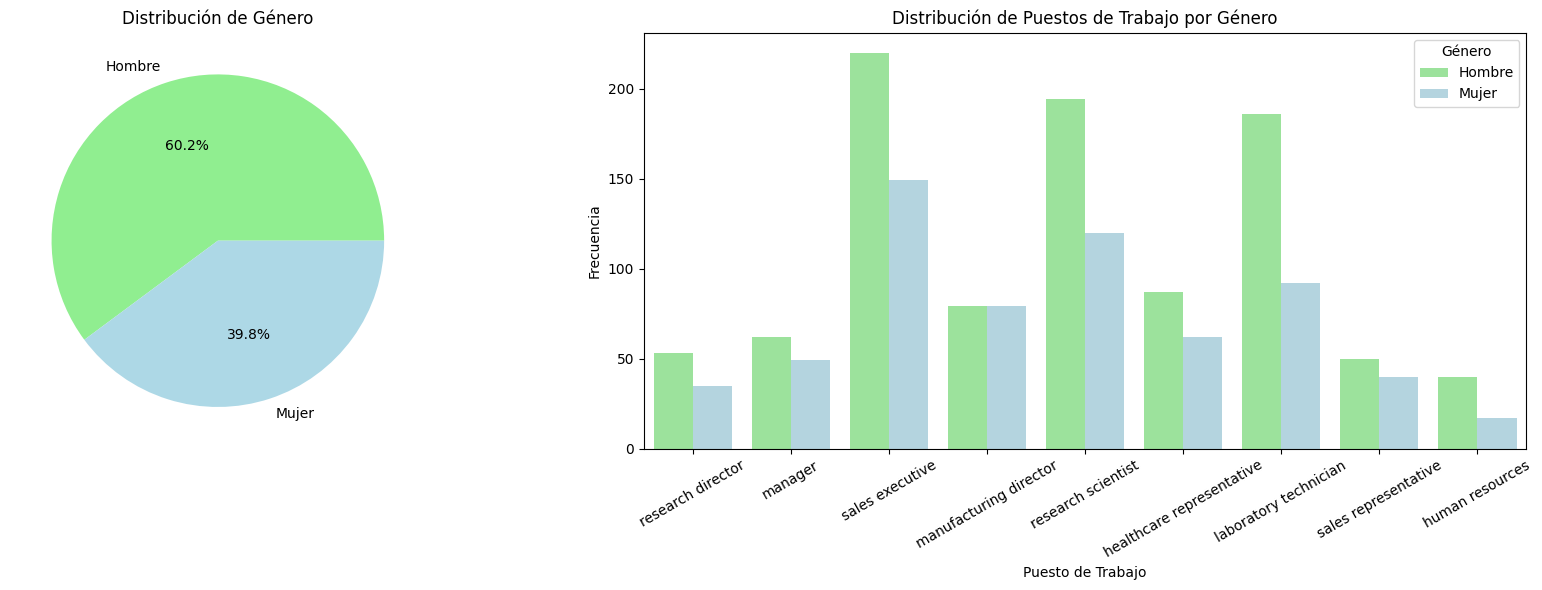

In [58]:
#diferencias entre hombre y mujeres - vemos que hay bastante mas hombres que mujeres en la empresa.
#seria interesante buscar el nivel de manager de mujeres ? y ver, dentro de los que se han ido, cual es el porcentaje de mujeres y cual era su job level. 
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# 1. Distribución de género: Gráfico de pastel de la variable Gender
gender_counts = data['gender'].value_counts()
axs[0].pie(gender_counts, labels=['Hombre', 'Mujer'], autopct='%1.1f%%', colors=['lightgreen', 'lightblue'])
axs[0].set_title('Distribución de Género')

# 2. Distribución de puestos de trabajo por género: Gráfico de barras apiladas
sns.countplot(data=data, x='job_role', hue='gender', palette=['lightgreen', 'lightblue'], ax=axs[1])
axs[1].set_title('Distribución de Puestos de Trabajo por Género')
axs[1].set_xlabel('Puesto de Trabajo')
axs[1].set_ylabel('Frecuencia')
axs[1].legend(title='Género', labels=['Hombre', 'Mujer'])
plt.xticks(rotation=30)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

añadir algo inteligente

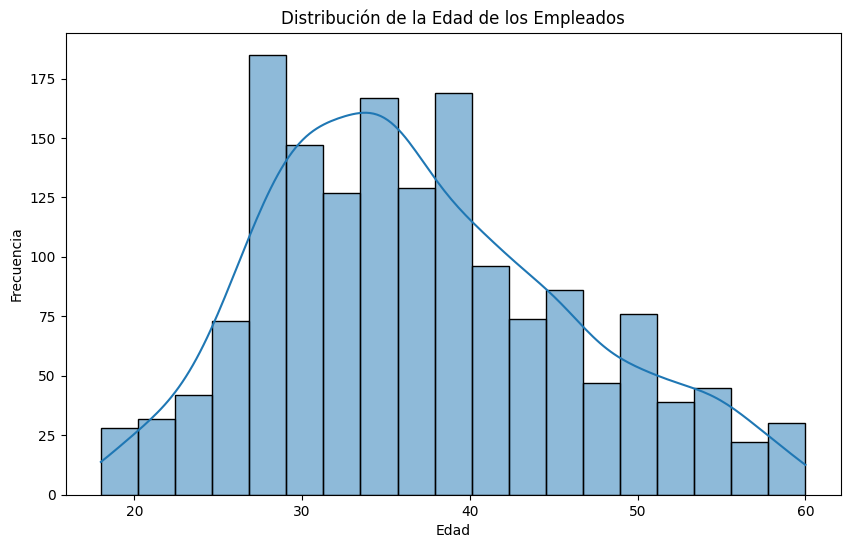

In [69]:
plt.figure(figsize=(10, 6))

sns.histplot(data['age'], 
             kde=True)

plt.title('Distribución de la Edad de los Empleados')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

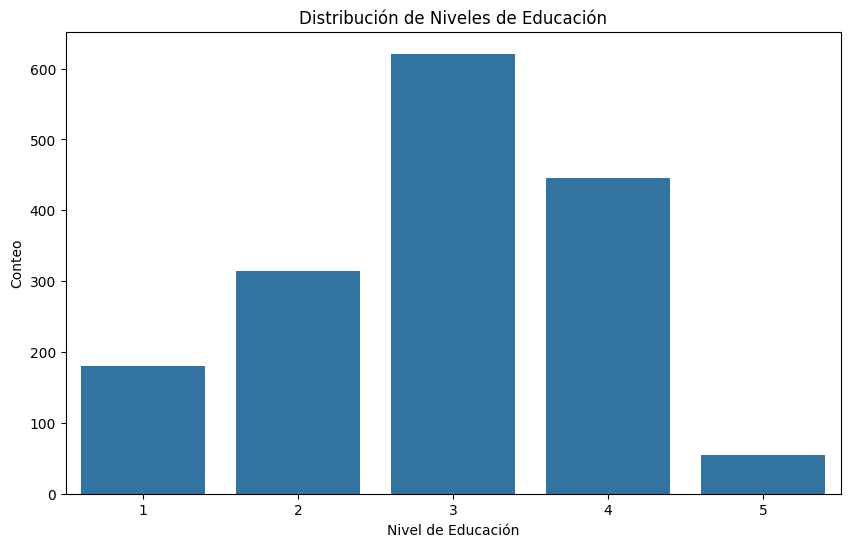

In [71]:
plt.figure(figsize=(10, 6))

sns.countplot(x='education', 
              data=data)

plt.title('Distribución de Niveles de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Conteo')
plt.show()

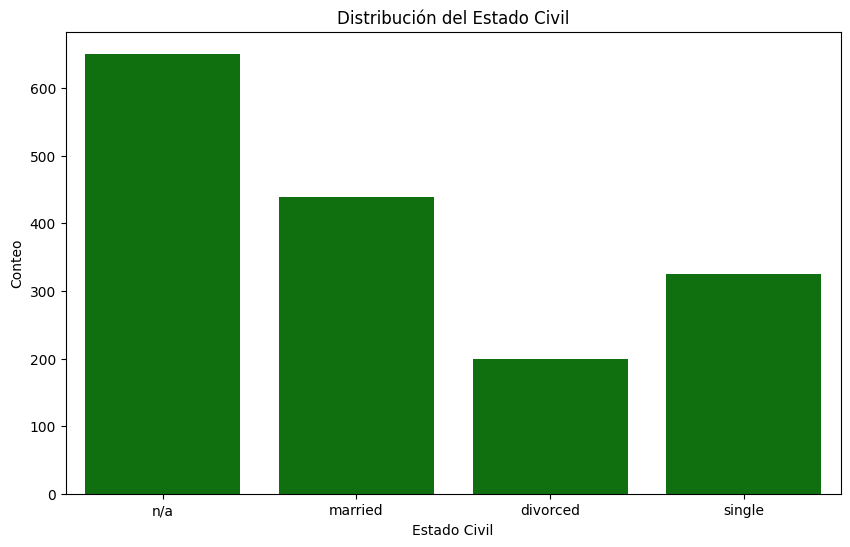

In [78]:
plt.figure(figsize=(10, 6))

sns.countplot(x='marital_status', 
              data=data,
              color="green")

plt.title('Distribución del Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Conteo')
plt.show()

#

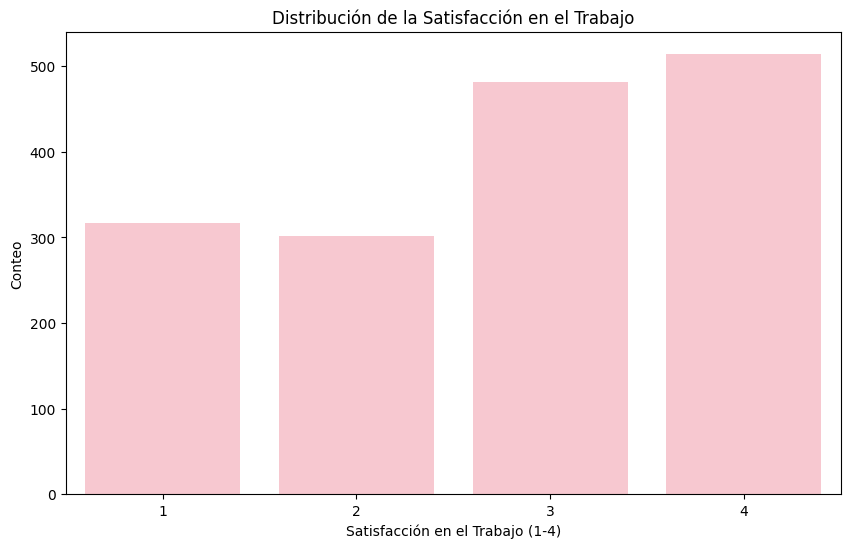

In [75]:
plt.figure(figsize=(10, 6))

sns.countplot(x='job_satisfaction', 
              data=data,
              color="pink")

plt.title('Distribución de la Satisfacción en el Trabajo')
plt.xlabel('Satisfacción en el Trabajo (1-4)')
plt.ylabel('Conteo')
plt.show()

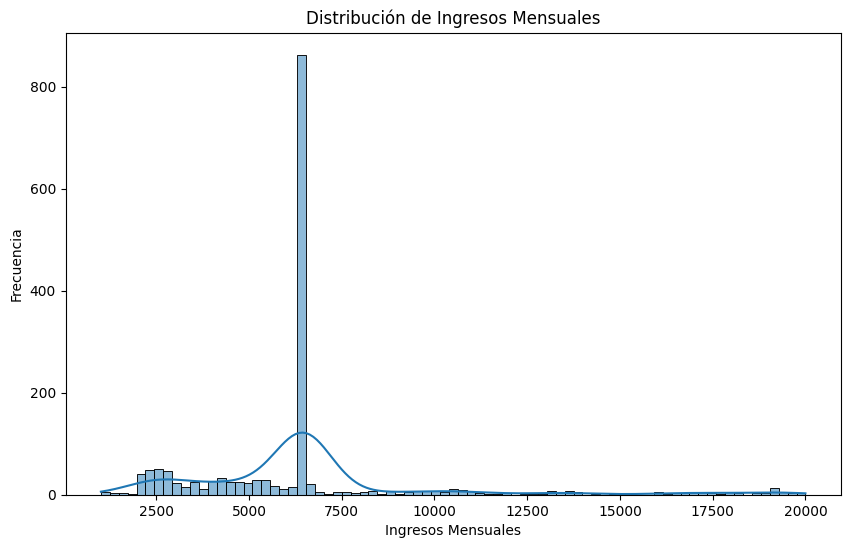

In [79]:
plt.figure(figsize=(10, 6))

sns.histplot(data['monthly_income'], 
             kde=True)

plt.title('Distribución de Ingresos Mensuales')
plt.xlabel('Ingresos Mensuales')
plt.ylabel('Frecuencia')
plt.show()

#eso es raro no?

Basandonos en el concepto de survivorship bias, vamos a centrarnos en los clientes que siguen en la empresa y estudiar que es lo que les hace felices, para replicarlo a todos. Buscamos patrones de alegria.

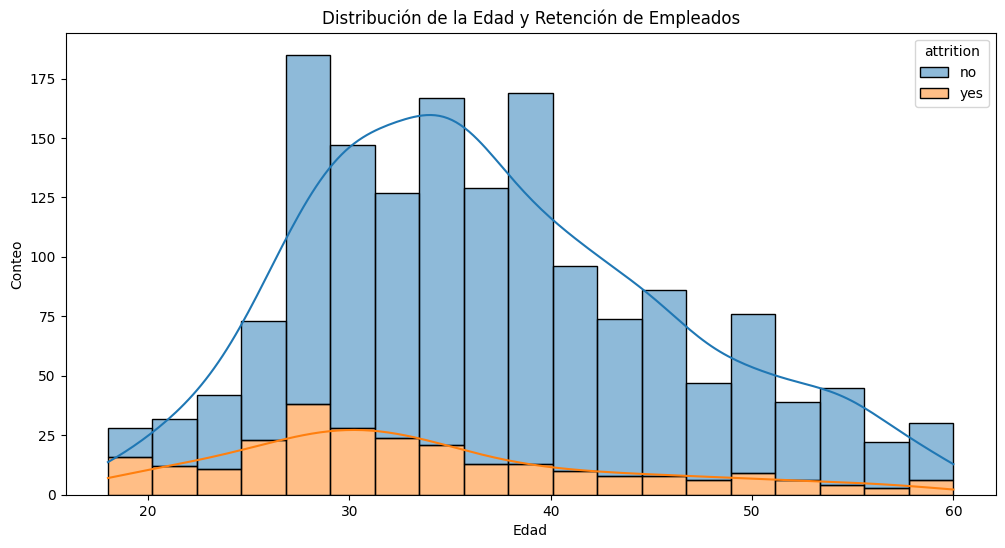

In [60]:
#Estoy buscando una relación entre la edad del empleado y su retención.

plt.figure(figsize=(12, 6))
sns.histplot(data=data, 
             x='age', 
             hue='attrition', 
             multiple='stack', 
             kde=True)

plt.title('Distribución de la Edad y Retención de Empleados')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.show()

añadir algo inteligente

In [61]:
#Buscamos si la satisfaccion laboral tiene que ver con la retención de empleados, es decir, un cliente tiene que estar mal para irse? 
#Eso nos levanta otra pregunta, si esta feliz y se ha ido, porque sera? Sueldo bajo? no remote work? distance from home very far? 

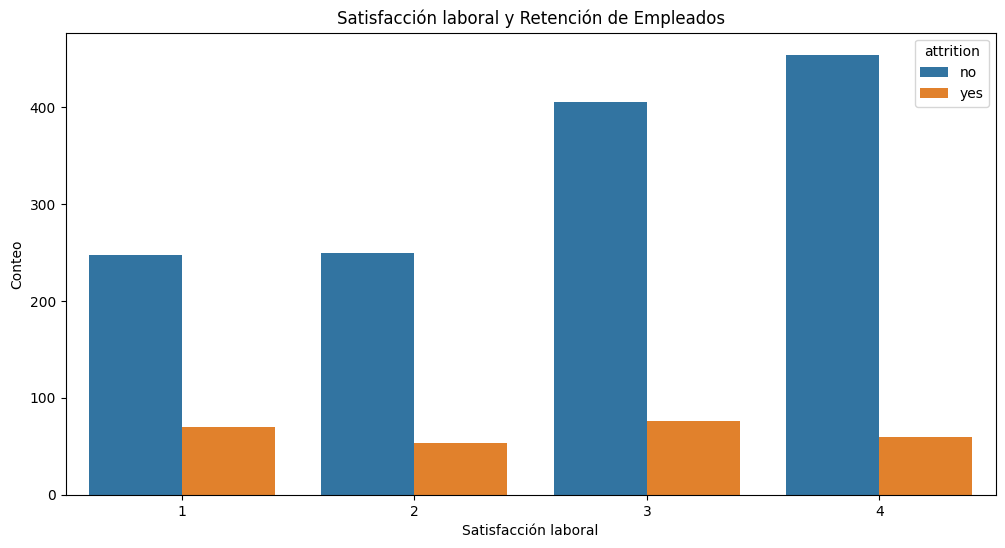

In [63]:
plt.figure(figsize=(12, 6))

sns.countplot(data=data, 
              x='job_satisfaction', 
              hue='attrition')

plt.title('Satisfacción laboral y Retención de Empleados')
plt.xlabel('Satisfacción laboral')
plt.ylabel('Conteo')
plt.show()

aqui podemos ver que para los que se han ido, los niveles estan bastante igualados.
Añadir otra cosa inteligente

Ahora vamos con el money loli

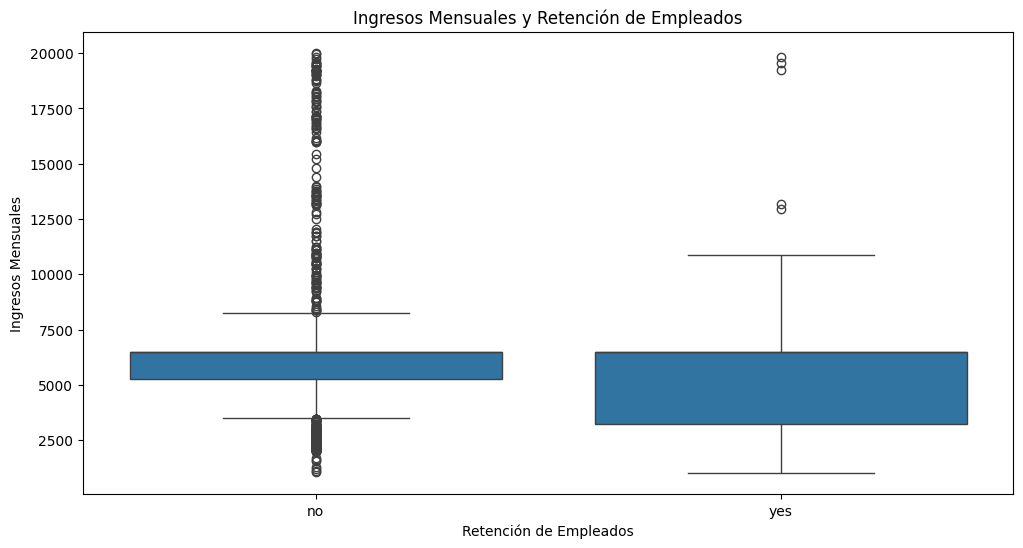

In [64]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=data,
            x='attrition',
            y='monthly_income')

plt.title('Ingresos Mensuales y Retención de Empleados')
plt.xlabel('Retención de Empleados')
plt.ylabel('Ingresos Mensuales')
plt.show()

hablarlo con Silvia porque no me entiendo muy bien el boxplot 

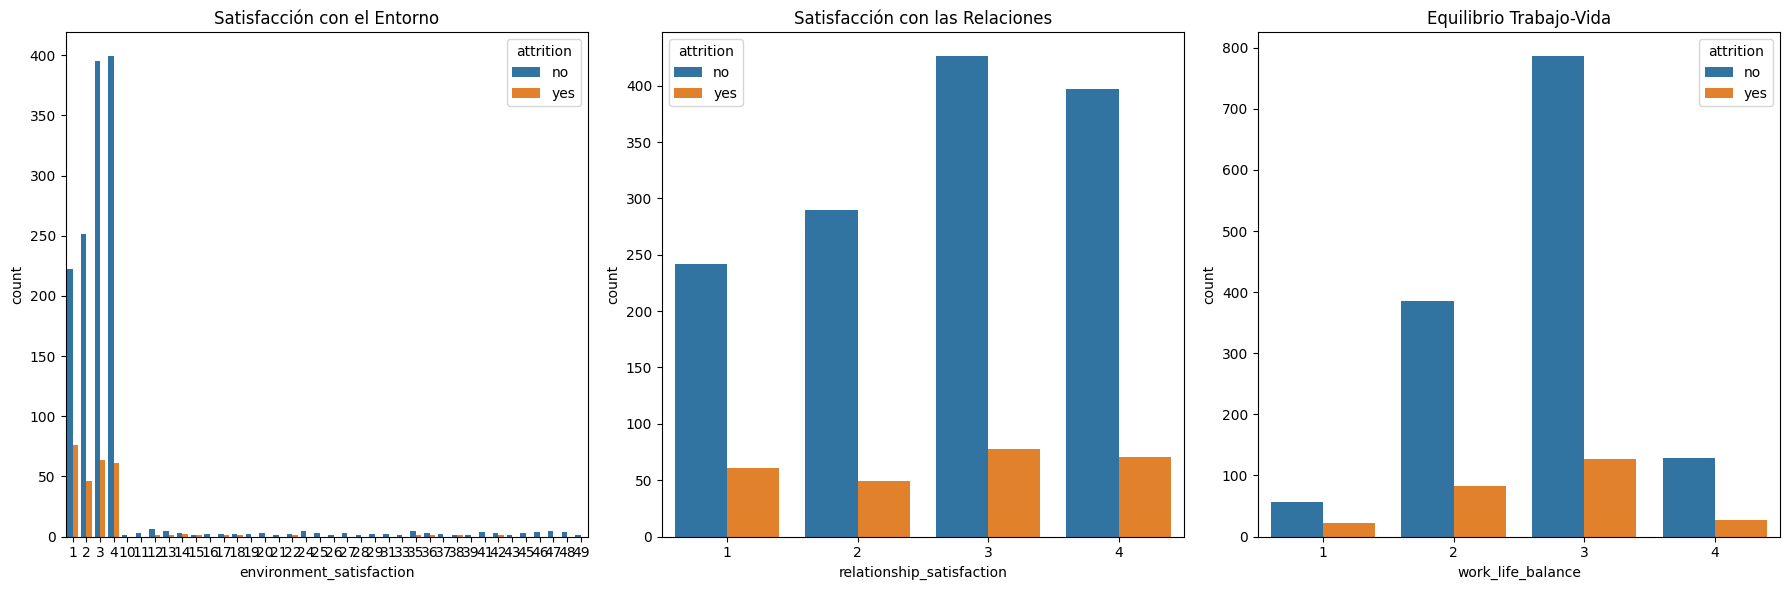

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(data=data, x='environment_satisfaction', hue='attrition', ax=axes[0])
axes[0].set_title('Satisfacción con el Entorno')

sns.countplot(data=data, x='relationship_satisfaction', hue='attrition', ax=axes[1])
axes[1].set_title('Satisfacción con las Relaciones')

sns.countplot(data=data, x='work_life_balance', hue='attrition', ax=axes[2])
axes[2].set_title('Equilibrio Trabajo-Vida')

plt.tight_layout()
plt.show()

he puesto juntos diferentes tipos de satisfación (el enterno, las relaciones laborales y el equilibrio trabajo/vida) para ver como afecta a los empleados (los que se han ido y los que estan aqui todavia)

- poner la grafica bonita y ver si no añado el distance from home aqui

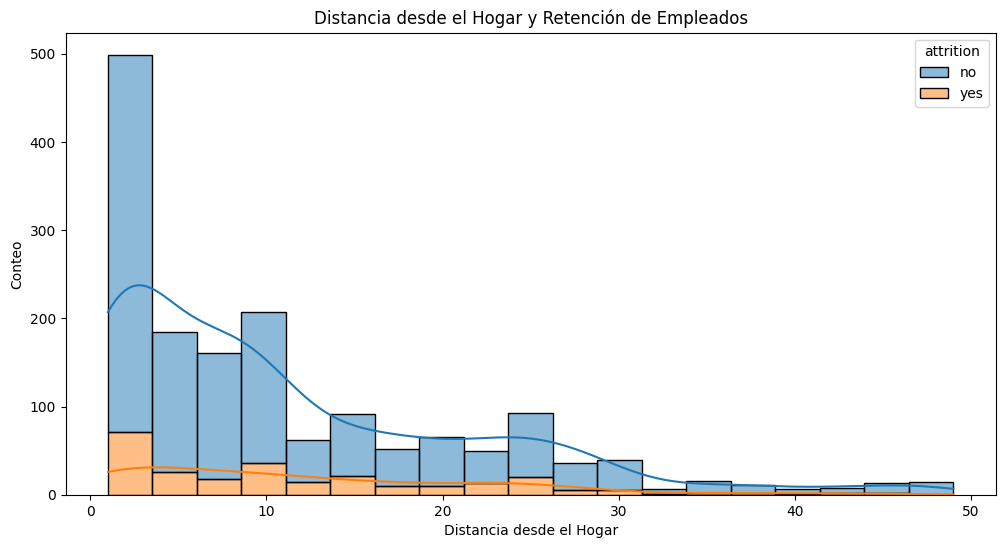

In [66]:
plt.figure(figsize=(12, 6))

sns.histplot(data=data,
            x='distance_from_home',
            hue='attrition',
            multiple='stack', 
            kde=True)

plt.title('Distancia desde el Hogar y Retención de Empleados')
plt.xlabel('Distancia desde el Hogar')
plt.ylabel('Conteo')
plt.show()